<a href="https://colab.research.google.com/github/anshdesaii/assignment/blob/main/Unsupervised_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering is an unsupervised learning technique that groups similar data points together based on patterns in the data

Customer segmentation in marketing

Market basket analysis

Image compression

Social media content categorization




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("/content/customer_segmentation.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [14]:
df["Income"]=df["Income"].fillna(df["Income"].mean())

In [16]:
df = df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

KeyError: "['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'] not found in axis"

In [17]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


In [18]:
df_encode=pd.get_dummies(df,drop_first="true")

In [19]:
df_encode

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,True,False,False,False,False,True,False,False,False,False
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,False,False,True,False,False,False,False,True,False,False
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,True,False,False,False,True,False,False,False,False,False
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,False,True,False,False,False,False,False,True,False,False


In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encode)

In [24]:
kmeans=KMeans(n_clusters=5,random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [34]:
labels = kmeans.labels_

In [35]:
df['Customer'] = labels

In [36]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster,Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,4,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,2,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,4,4
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,0,1,1
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,0,1,1
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,0,1,1
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,0,1,1


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

array([[ 3.78842452, -1.12253725],
       [-2.32773681, -0.45554087],
       [ 1.65207423, -0.40354016],
       ...,
       [ 1.51775701,  0.08418994],
       [ 1.71646636,  1.50958706],
       [-1.68019388,  1.69796148]])

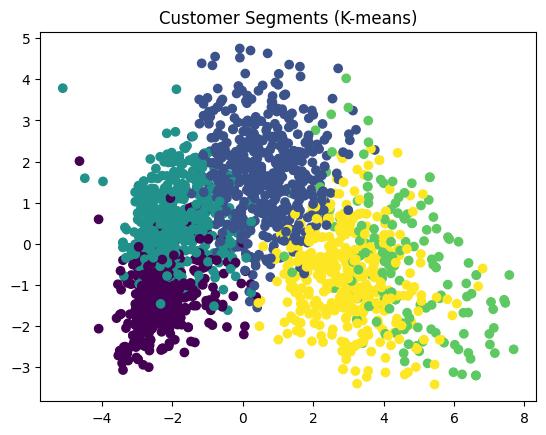

In [39]:
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['Customer'])
plt.title("Customer Segments (K-means)")
plt.show()

In [46]:
cluster_profile = df.groupby('Customer').mean(numeric_only=True)

In [47]:
cluster_profile

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster
Customer,,,,,,,,,,,,,,,,,,,,,
0,1978.463845,29392.653010,0.851852,0.028219,47.904762,32.686067,6.432099,26.820106,9.790123,6.522046,...,3.105820,6.978836,0.097002,0.001764,0.000000,0.001764,0.000000,0.014109,0.128748,0.0
1,1964.564797,58799.816744,0.201161,0.943907,48.030948,505.441006,21.771760,140.849130,28.783366,22.363636,...,8.042553,5.758221,0.067698,0.150870,0.003868,0.038685,0.013540,0.007737,0.114120,1.0
2,1963.280220,42898.939580,0.692308,0.935897,50.860806,68.261905,4.542125,27.065934,6.564103,4.587912,...,3.613553,5.851648,0.042125,0.018315,0.000000,0.000000,0.003663,0.009158,0.051282,2.0
3,1969.083333,81845.977687,0.047619,0.130952,49.761905,874.720238,56.613095,467.738095,77.773810,66.041667,...,8.226190,2.982143,0.142857,0.386905,0.958333,0.434524,0.125000,0.005952,0.583333,3.0
4,1968.097285,74198.548092,0.049774,0.219457,49.504525,490.375566,72.450226,435.710407,106.278281,71.857466,...,8.361991,2.893665,0.058824,0.029412,0.000000,0.113122,0.000000,0.006787,0.171946,4.0
